In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import pyro
import dppl

In [4]:
import torch


### Basic example showing the interface of *DeepPPL*
The model impose a uniform prior to the bias of the coin and define each coin flip as a bernoulli distribution given the bias 


In [5]:
sns.set_style('whitegrid')

In [6]:
model = dppl.DppplModel(model_file = 'tests/good/coin.stan')

In [7]:
posterior = model.posterior()

In [8]:
x = torch.Tensor([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0])

In [9]:
marginal = pyro.infer.EmpiricalMarginal(posterior.run(x), sites='theta')

In [12]:
serie = pd.Series([marginal().item() for _ in range(3000)], name = r'$\theta$')

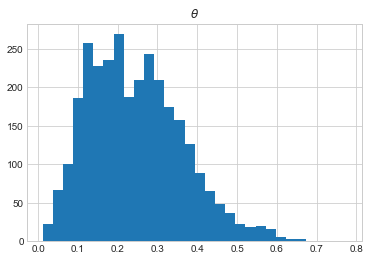

In [15]:
serie.hist(bins=30)
plt.title(serie.name);